# Check the photon energy 

It seems like the photon energy is off. Make some nice plots.

In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FuncFormatter

import gc

from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.lines import Line2D
     

from cycler import cycler
import matplotlib

# Set the color cycle
#plt.rc('axes', prop_cycle=cycler('color', ['#73b06f', '#e6701b', '#007090', '#c7463d', '#ffad08', '#6f73b0', '#56b4e9', '#4c6e3d', '#c47ca2', '#f5f575']))
# https://coolors.co/542344-f68e5f-e5e059-007ea7-98e2c6
plt.rc('axes', prop_cycle=cycler('color', ['#73b06f', '#e6701b', '#007090', '#e7298a', '#802392', '#ffad08', '#56b4e9']))

# Configure Matplotlib to use LaTeX fonts
#matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"

# Set font sizes
matplotlib.rcParams.update(
    {
        "font.size": 16,  # General font size
    }
)
     
%load_ext autoreload
%autoreload 2



In [3]:
save_status = False # save all histograms!

In [54]:
path = "/afs/cern.ch/work/s/saaumill/public/MyFCCAnalyses/outputs/histmaker_fullsim/ZHgamma_btag/p8_ee_Hgamma_ecm240.root"
file = uproot.open(path)

In [55]:
def plot_hists(figsize=(7,5), save_status=False):
    fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)

    # keys = ["gen_photons_p;1", "p_boosted_gamma_for_recoil;1", "photons_p_all;1"]
    # labels = ["MC Photon", "Reco Photon (Selected)", "Reco Photon (All)"]
    keys = ["gen_photons_p;1", "photons_p_all;1", "photons_p_shifted;1"]
    labels = ["MC Photons", "Reco Photons", "Reco Photons (Shifted)"]

    for i, key in enumerate(keys):
        d = file[key]
        hist, edges = d.to_numpy()
        bin_centers = (edges[:-1] + edges[1:]) / 2  
        ax.hist(bin_centers, bins=edges, weights=hist, histtype="step", linewidth=2, label=labels[i])
        ax.set_xlabel(r"$E$ (GeV)")
        ax.set_ylabel(r"$N$")
        ax.grid(True)
    # draw red vertical line at 87.5 GeV
    ax.axvline(x=87.5, color='red', linestyle='--', label="Expected Photon Energy")
    plt.legend()
    plt.show()

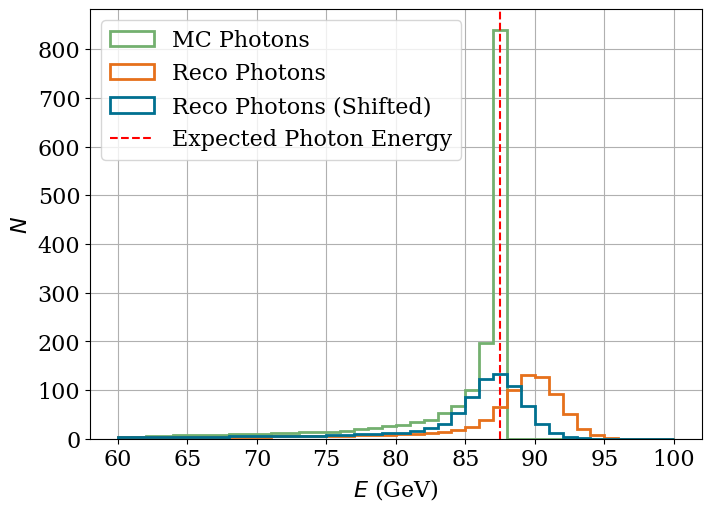

In [56]:
plot_hists()

In [50]:
hist, edge = file["gen_photons_p;1"].to_numpy()
# calculate mean
mean_gen = np.sum(hist * edge[:-1]) / np.sum(hist)
print("Mean gen: ", mean_gen)

hist, edge = file["photons_p_all;1"].to_numpy()
# calculate mean
mean_reco = np.sum(hist * edge[:-1]) / np.sum(hist)
print("Mean reco: ", mean_reco)

print("difference: ", mean_reco - mean_gen)

Mean gen:  83.98408704018948
Mean reco:  86.55799783939503
difference:  2.5739107992055494


Shift photon energies by 2.6 GeV !! 